/tmp/ipython-input-3452357232.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


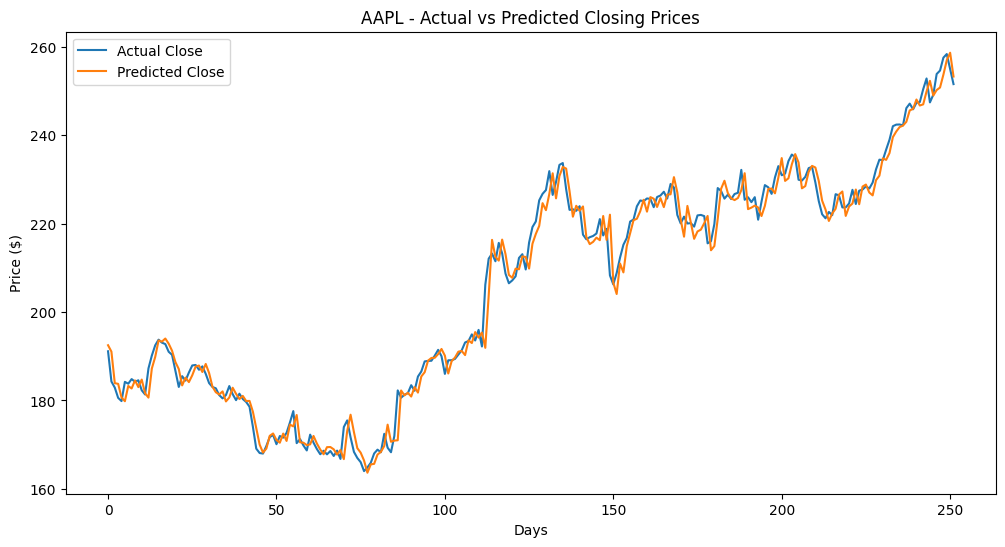

Mean Squared Error: 9.672187067493219


In [ ]:
# importing libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# downloading historical stock data
stock = "AAPL"
df = yf.download(stock, start="2020-01-01", end="2024-12-31")

# selecting relevant columns and creating target column
df = df[['Open', 'High', 'Low', 'Volume', 'Close']].copy()
df['Next_Close'] = df['Close'].shift(-1)  # target is next day's close
df.dropna(inplace=True)

# splitting features and target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']

# splitting data into train and test sets (no shuffling due to time order)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# training linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predicting on test data
predictions = model.predict(X_test)

# plotting actual vs predicted closing prices
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Close')
plt.plot(predictions, label='Predicted Close')
plt.title(f"{stock} - Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

# printing mean squared error
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
